### Código em Python para o Algoritmo de Backpropagation

Construa um MLP(2, 2, 2) de acordo com a arquitetura mostrada abaixo, para classificar as frutas Maçã e Laranja. As frutas serão identificadas através de duas características (features), tamanho (0,5 = Maçã e 0,8 = Laranja) e textura (lisa = 0,2 = Maçã e áspera = 0,6 = Laranja). Então, como amostras iniciais, considere Maça = [0,5; 0,2] e Laranja = [0,8; 0,6]. A saída: (i) se for Maçã, deve ser [1, 0] e (ii) se for Laranja,
deve ser [0, 1].

![Not Found](./Figuras/exemplo.png)


In [1]:
# Bibliotecas
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Funções Auxiliares
def choose_derivate(derivate_function, valor):
  """
  Função que escolhe a derivada
  """
  if derivate_function == "sigmoide":
    return valor * (1 - valor)
  elif derivate_function == "relu":
    return 1.0 if valor >= 0 else 0

def choose_activation_function(activation_function, valor):
  """
  Função que escolhe a função de ativação
  """
  if activation_function == "sigmoide":
    sigmoid = 1 / (1 + np.exp(-valor))
    return sigmoid
  elif activation_function == "relu":
    relu = np.maximum(0, valor)
    return relu

In [ ]:
def train_mlp(X:np.ndarray,
              d:np.ndarray,
              initial_weights:float,
              initial_bias:float,
              learning_rate:float,
              alpha:float,
              max_epochs:int,
              activation_function:str):
    """
    Treina um MLP(2,2,2) por um número de épocas e retorna o histórico do RMSE.

    Args:
        X (numpy.ndarray): Matriz de entrada (amostras).
        d (numpy.ndarray): Matriz de saídas desejadas.
        initial_weights (float): Pesos iniciais. Nessa implementação
        todos os pesos serão iguais
        initial_bias (float): Vetor de vieses iniciais.  Nessa
        implementação todos os bias serão iguais
        learning_rate (float): Taxa de aprendizado (eta).
        alpha (float): Taxa de momento.
        max_epochs (int): Número máximo de épocas de treinamento.
        activation_function (str): Função de ativação.

    Returns:
        tuple: Uma tupla contendo:
            - numpy.ndarray: Pesos finais.
            - numpy.ndarray: Vieses finais.
            - list: Histórico do RMSE por época.
    """
    neurons = [2, 2, 2] # [Entrada, Camadas, Neurônios por Camada]
    # Pesos iniciais
    matrix_initial_weights = np.full((4, 2), initial_weights)

    # Bias iniciais
    initial_bias = np.full(4, initial_bias)

    # Variáveis auxiliares
    nro_total_neurons = neurons[1] * neurons[2]
    outputs = np.zeros(nro_total_neurons)
    errors = np.zeros(nro_total_neurons)

    # Inicializando as variáveis para o momento
    first_iter = np.zeros_like(matrix_initial_weights)
    first_bias = np.zeros_like(initial_bias)

    rmse_values = []

    for epoch in range(max_epochs):
        print(f"Epoch [{epoch+1}/{max_epochs}]")
        errors_sum = []

        for sample_index in range(X.shape[0]):
            x_sample = X[sample_index]
            d_sample = d[sample_index]
            #################################################################################################################
            # Etapa 1: Forward Propagation
            #################################################################################################################
            for neuro_index in range(nro_total_neurons):

              if neuro_index < neurons[1]: # Camada Oculta

                # Cálculo da saída do Neurônio 1,2 (v)
                v = initial_bias[neuro_index] + x_sample[0] * matrix_initial_weights[neuro_index][0] + x_sample[1] * matrix_initial_weights[neuro_index][1]

                # Aplicando v na função de ativação
                outputs[neuro_index] = choose_activation_function(activation_function, v)

              else: # Camada de Saída
                # Cálculo da saída do Neurônio 3,4 (v)
                v = initial_bias[neuro_index] + outputs[0] * matrix_initial_weights[neuro_index][0] + outputs[1] * matrix_initial_weights[neuro_index][1]

                # Aplicando v na função de ativação
                outputs[neuro_index] = choose_activation_function(activation_function, v)

                # Erro da saída do Neurônio 3 e 4 em comparação à saída esperada
                errors[neuro_index] = d_sample[neuro_index - 2] - outputs[neuro_index]
                errors_sum.append(errors[neuro_index])

            # print("Saídas y = ",outputs)
            #################################################################################################################
            # Etapa 2: Backpropagation
            #################################################################################################################
            gradient_output = np.zeros(neurons[2])
            # Cálculo do gradiente local nos neurônios de saída
            for neuro_index in range(nro_total_neurons - 2):
              gradient_output[neuro_index] = choose_derivate(activation_function,outputs[neuro_index + 2]) * errors[neuro_index + 2]

            gradient_hidden = np.zeros(neurons[1])
            # Cálculo do gradiente local nos neurônios na camada oculta
            for neuro_index in range(nro_total_neurons - 2):
              delta = gradient_output[0] * matrix_initial_weights[2][neuro_index] + gradient_output[1] * matrix_initial_weights[2][neuro_index]
              gradient_hidden[neuro_index] = choose_derivate(activation_function, outputs[neuro_index]) * delta

            #################################################################################################################
            # Etapa 3: Atualização de Pesos e Bias
            #################################################################################################################
            # Ajuste dos pesos utilizados a regra de aprendizagem
            gradients_local = np.concatenate([gradient_hidden, gradient_output])
            # print("Gradientes locais = ",gradients_local)

            for linha in range(matrix_initial_weights.shape[0]):
              for coluna in range(matrix_initial_weights.shape[1]):

                momemtum = alpha * first_iter[linha][coluna]

                if linha < 2:
                  learning = learning_rate * gradients_local[coluna] * x_sample[coluna]
                else:

                  learning = learning_rate * gradients_local[linha] * outputs[coluna]

                matrix_initial_weights[linha][coluna] += learning + momemtum

            print("Pesos Atualizados=\n",matrix_initial_weights)

            # Atualizando os bias pela regra da aprendizagem
            for b in range(len(initial_bias)):
              momentum = alpha * first_bias[b]
              initial_bias[b] += (learning_rate * gradients_local[b]) + momemtum

            print("Pesos:", initial_bias)
            first_iteration = matrix_initial_weights.copy()
            first_bias = initial_bias.copy()

        # Calculando RMSE
        rmse = np.sqrt(sum(np.array(errors_sum)**2)) / 2
        rmse_values.append(rmse)
        if rmse < 0.1:
            print(f"Treinamento parou na época {epoch + 1} com RMSE de {rmse:.4f}")
            break
    return matrix_initial_weights, initial_bias, rmse_values

In [4]:
X = np.array([[0.5, 0.2],
     [0.8, 0.6]])

d = np.array([[1,0], # Maçã
     [0,1]]) # Laranja

pesos, bias, rmses_sigmoide = train_mlp(X=X,
                              d=d,
                              initial_weights=0.1,
                              initial_bias=0.1,
                              learning_rate=0.5,
                              alpha=0.1,
                              max_epochs=10,
                              activation_function="sigmoide")

Epoch [1/10]
Pesos Atualizados=
 [[0.09958375 0.0998335 ]
 [0.09958375 0.0998335 ]
 [0.10986982 0.10986982]
 [0.08871492 0.08871492]]
Pesos: [0.09916749 0.09916749 0.15805774 0.03361719]
Pesos Atualizados=
 [[0.09885818 0.09928933]
 [0.09885818 0.09928933]
 [0.09356544 0.09356544]
 [0.1030486  0.1030486 ]]
Pesos: [0.09826054 0.09826054 0.08976273 0.09365741]
Epoch [2/10]
Pesos Atualizados=
 [[0.09849688 0.0991448 ]
 [0.09849688 0.0991448 ]
 [0.10336779 0.10336779]
 [0.09195227 0.09195227]]
Pesos: [0.09753793 0.09753793 0.14826766 0.02742943]
Pesos Atualizados=
 [[0.09785498 0.09866338]
 [0.09785498 0.09866338]
 [0.0873377  0.0873377 ]
 [0.10615184 0.10615184]]
Pesos: [0.09673556 0.09673556 0.0802924  0.08764243]
Epoch [3/10]
Pesos Atualizados=
 [[0.09754204 0.0985382 ]
 [0.09754204 0.0985382 ]
 [0.0970821  0.0970821 ]
 [0.09522214 0.09522214]]
Pesos: [0.09610966 0.09610966 0.13920806 0.02156036]
Pesos Atualizados=
 [[0.09697517 0.09811305]
 [0.09697517 0.09811305]
 [0.08129656 0.081296

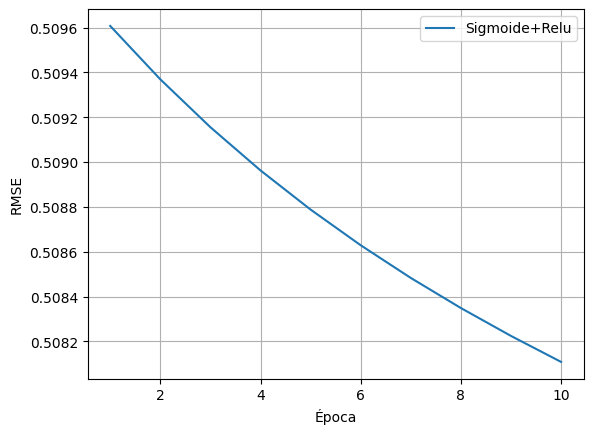

In [ ]:
# Para gerar a curva do RMSE, você pode plotar a lista rmse_history
plt.plot(range(1, len(rmses_sigmoide) + 1), rmses_sigmoide, label="Sigmoide")
plt.xlabel('Época')
plt.ylabel('RMSE')
plt.legend()
plt.grid()
plt.savefig("./Figuras/mix.png")
plt.show()